In [91]:
import matplotlib.pyplot as plt
import xarray as xr 
import numpy as np  
import glob
import os
import math


In [2]:
import rioxarray
import rasterio
from rasterio.merge import merge
import glob

# Step 1: Locate all .hgt files
hgt_files = glob.glob("/Users/cowherd/Downloads/eastriver_srtm/*.hgt")  # Modify the path if necessary

# Step 2: Open each .hgt file with rasterio
src_files_to_merge = []
for f in hgt_files:
    src = rasterio.open(f)
    src_files_to_merge.append(src)

# Step 3: Merge the DEMs
merged_dem, out_transform = merge(src_files_to_merge)

# Step 4: Update metadata
out_meta = src_files_to_merge[0].meta.copy()
out_meta.update({
    "driver": "GTiff",
    "height": merged_dem.shape[1],
    "width": merged_dem.shape[2],
    "transform": out_transform,
    "crs": src_files_to_merge[0].crs
})

# Step 5: Save the merged DEM as a GeoTIFF
output_file = "/Users/cowherd/Downloads/eastriver_srtm/eastriver_merged_srtm.tif"
with rasterio.open(output_file, "w", **out_meta) as dest:
    dest.write(merged_dem)

print(f"DEM merged and saved as {output_file}")


DEM merged and saved as /Users/cowherd/Downloads/eastriver_srtm/eastriver_merged_srtm.tif


In [1]:
import rioxarray
import rasterio
from rasterio.merge import merge
import glob

# Step 1: Locate all .hgt files
hgt_files = glob.glob("/Users/cowherd/DATA/SRTM/*.hgt")  # Modify the path if necessary

# Step 2: Open each .hgt file with rasterio
src_files_to_merge = []
for f in hgt_files:
    src = rasterio.open(f)
    src_files_to_merge.append(src)

# Step 3: Merge the DEMs
merged_dem, out_transform = merge(src_files_to_merge)

# Step 4: Update metadata
out_meta = src_files_to_merge[0].meta.copy()
out_meta.update({
    "driver": "GTiff",
    "height": merged_dem.shape[1],
    "width": merged_dem.shape[2],
    "transform": out_transform,
    "crs": src_files_to_merge[0].crs
})

# Step 5: Save the merged DEM as a GeoTIFF
output_file = "/Users/cowherd/Documents/caldor-snow/data/srtm_creekfire.tif"
with rasterio.open(output_file, "w", **out_meta) as dest:
    dest.write(merged_dem)

print(f"DEM merged and saved as {output_file}")


DEM merged and saved as /Users/cowherd/Documents/caldor-snow/data/srtm_creekfire.tif


/var/folders/vx/vw0r7k2s5wj9x5l849ft95ldgqgh30/T/ipykernel_48081/2577181321.py:4: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  xr.open_rasterio(output_file).plot(ax=ax, cmap="terrain")


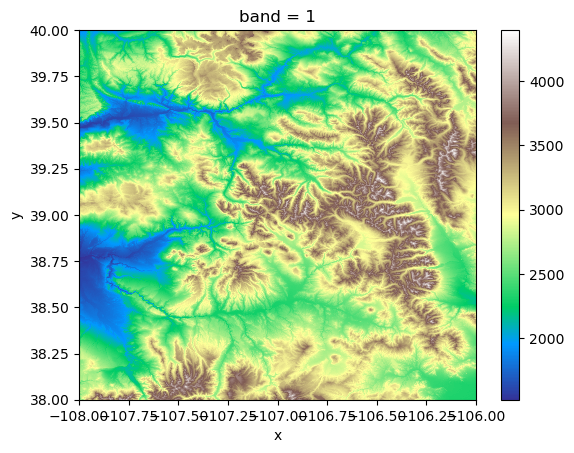

In [5]:
import matplotlib.pyplot as plt
import xarray as xr
fig, ax = plt.subplots()
xr.open_rasterio(output_file).plot(ax=ax, cmap="terrain")

plt.show()

In [87]:
srtmdir = '/Users/cowherd/Documents/SRTM/'

In [93]:
fns = glob.glob(srtmdir + '*.hgt')

In [28]:
## one file ## 

fn =fns [0]

siz = os.path.getsize(fn)
dim = int(math.sqrt(siz/2))

assert dim*dim*2 == siz, 'Invalid file size'

elevation = np.fromfile(fn, np.dtype('>i2'), dim*dim).reshape((dim, dim))

lat_base = int(fn.split('N')[1].split('W')[0])
lon_base = int(fn.split('N')[1].split('W')[-1].split('.')[0])

# Create an array of latitude values (assuming 1-degree spacing)
latitudes = np.linspace(lat_base, lat_base + 1, num=dim)

# Create an array of longitude values (assuming 1-degree spacing)
longitudes = np.linspace(lon_base, lon_base + 1, num=dim)

# Create an xarray dataset with the elevation data
elevation_data = elevation

# Create the xarray DataArray with latitude and longitude coordinates
elevation_da = xr.DataArray(elevation_data, coords={'lat': latitudes, 'lon': longitudes}, dims=('lat', 'lon'))

# Create the xarray dataset
elevation_ds = xr.Dataset({'elevation': elevation_da})

# Now, elevation_ds contains your elevation data with latitude and longitude coordinates



['/Users/cowherd/Documents/SRTM/N39W122.hgt',
 '/Users/cowherd/Documents/SRTM/N39W120.hgt',
 '/Users/cowherd/Documents/SRTM/N39W121.hgt',
 '/Users/cowherd/Documents/SRTM/N38W120.hgt',
 '/Users/cowherd/Documents/SRTM/N38W121.hgt',
 '/Users/cowherd/Documents/SRTM/N40W121.hgt',
 '/Users/cowherd/Documents/SRTM/N40W122.hgt',
 '/Users/cowherd/Documents/SRTM/N37W120.hgt']

In [95]:
elevation_files = [os.path.join(srtmdir, filename) for filename in os.listdir(srtmdir) if filename.endswith('.hgt')]
small_files = ['/Users/cowherd/Documents/SRTM/N37W120.hgt' ,'/Users/cowherd/Documents/SRTM/N38W120.hgt']
# Initialize an empty list to store xarray DataArrays
elevation_data_arrays = []

for fn in small_files: #elevation_files:
    siz = os.path.getsize(fn)
    dim = int(math.sqrt(siz / 2))

    assert dim * dim * 2 == siz, 'Invalid file size'

    elevation = np.fromfile(fn, np.dtype('>i2'), dim * dim).reshape((dim, dim))

    lat_base = int(fn.split('N')[1].split('W')[0])
    lon_base = int(fn.split('N')[1].split('W')[-1].split('.')[0])

    # Create an array of latitude values (assuming 1-degree spacing)
    latitudes = np.linspace(lat_base, lat_base + 1, num=dim)

    # Create an array of longitude values (assuming 1-degree spacing)
    longitudes = np.linspace(-lon_base,-(lon_base - 1), num=dim)

    # Create an xarray DataArray with latitude and longitude coordinates
    elevation_da = xr.DataArray(np.flipud(elevation), coords={'lat': latitudes, 'lon': longitudes}, dims=('lat', 'lon'))

    elevation_data_arrays.append(elevation_da)

combined_elevation_ds = xr.concat(elevation_data_arrays, dim = 'all') 
# elev = np.nanmax(combined_elevation_ds.values, axis = 0)
all_elev_ds = combined_elevation_ds.max(dim = 'all')

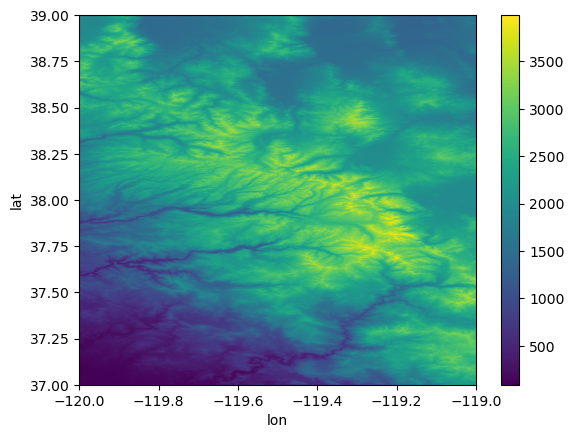

In [96]:
all_elev_ds.plot()

In [97]:
all_elev_ds.to_netcdf('srtm30_yose.nc')

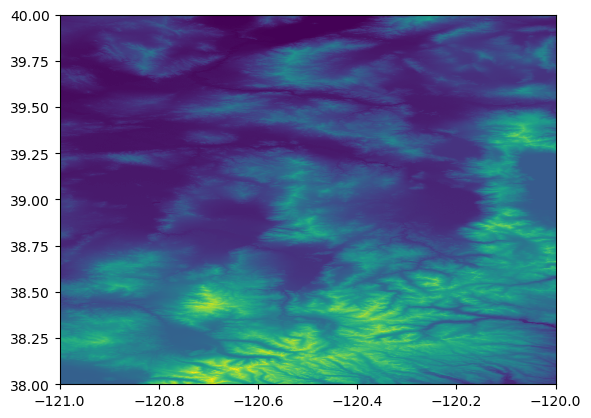

In [71]:
plt.pcolormesh(all_elev_ds.lon, all_elev_ds.lat, all_elev_ds.values)